# Logistic Regression with Kaggle Titanic data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('../Datasets/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
d = titanic_df.describe()
d

C:\Users\StrikeWade\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory analysis and plots
### Plot a bar diagram to check the number of numeric entries
** From the bar diagram, it shows that there are some age entries missing as the number of count for 'Age' is less than the other counts. We can do some impute/transformation of the data to fill-up the missing entries. **

In [5]:
#Transpose the df describe
dT = d.T
dT

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,NaN,NaN,NaN,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


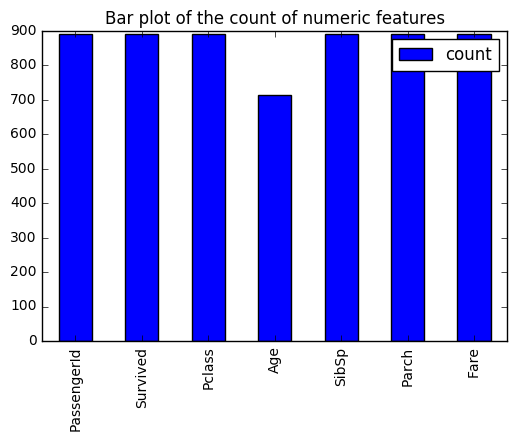

In [6]:
dT.plot.bar(y='count')
plt.title('Bar plot of the count of numeric features')

** Check the relative size of survived and not-survived **

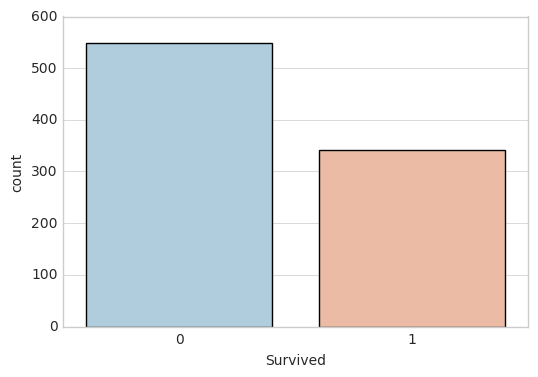

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_df, palette='RdBu_r')

** Is there a pattern for the survivability based on sex? **

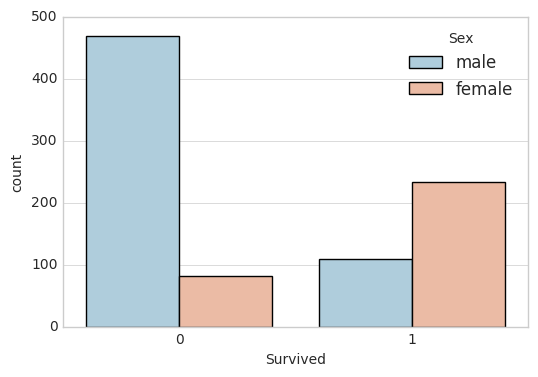

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic_df, palette='RdBu_r')

** What about any pattern related to passenger class? **

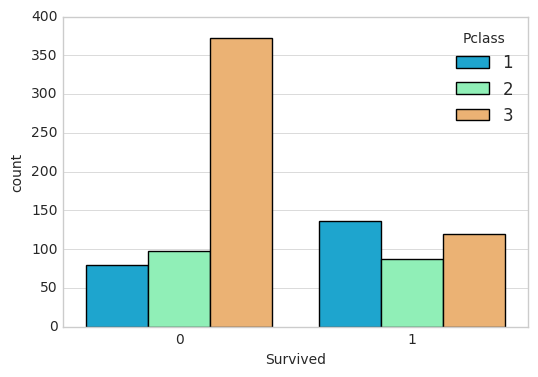

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic_df, palette='rainbow')

** Following code extracts and plots the fraction of passenger count that survived, by each class **

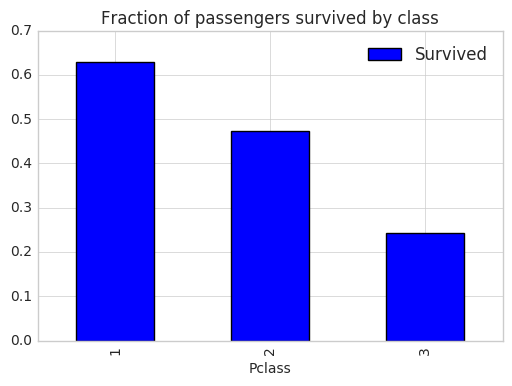

In [10]:
f_class_survived = titanic_df.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(data=f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title('Fraction of passengers survived by class')

** What about any pattern related to having sibling and spouse? **

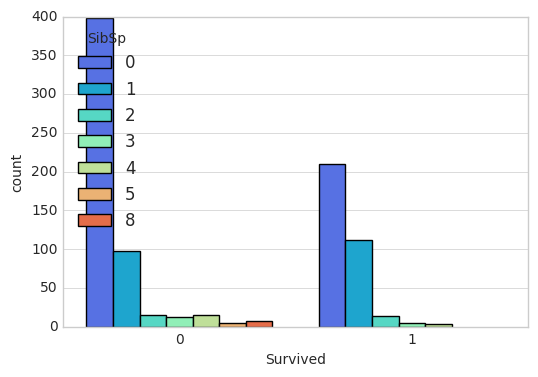

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='SibSp', data=titanic_df, palette='rainbow')

** How does the overall age distribution look like? **

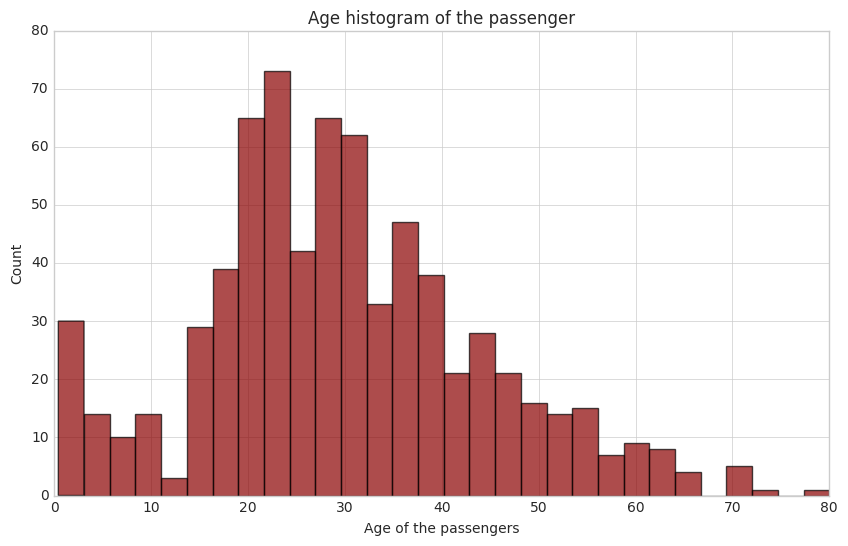

In [15]:
plt.xlabel('Age of the passengers')
plt.ylabel('Count')
plt.title('Age histogram of the passenger')
titanic_df['Age'].hist(bins=30, color='darkred', alpha=0.7, figsize=(10,6))

** How does the age distribution look like across passenger class? **
* It looks like that the average age is different for three classes and it generally decreases from 1st class to 3rd class.

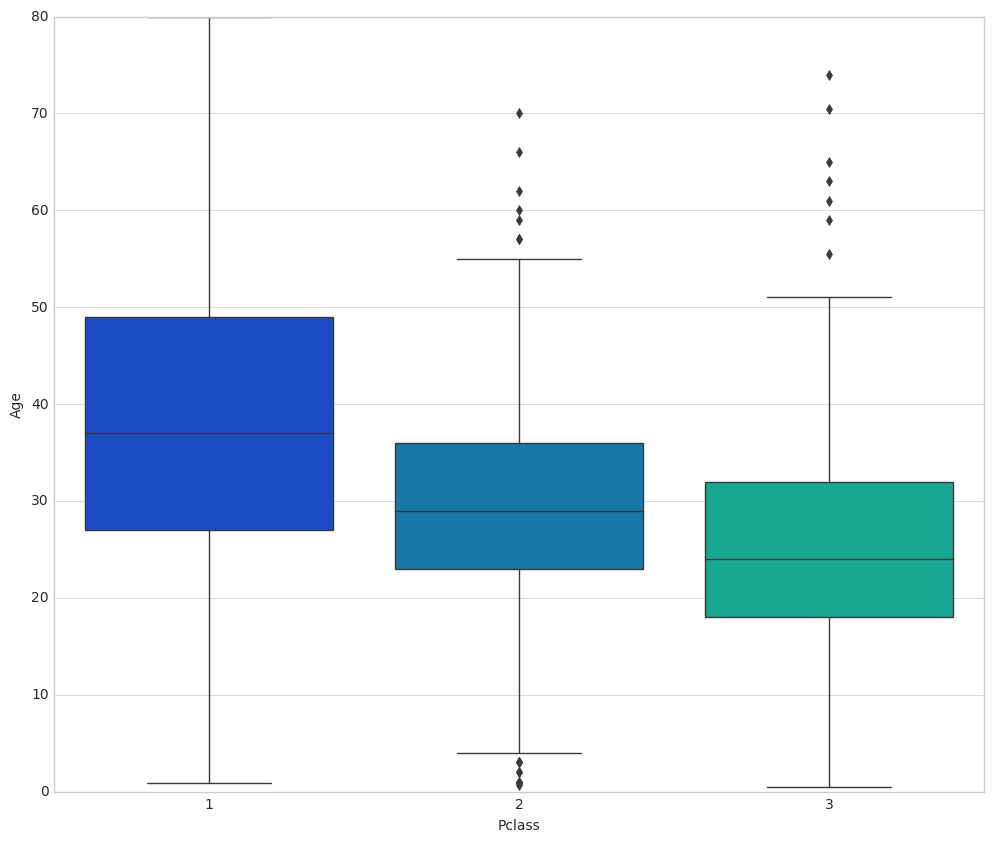

In [16]:
plt.figure(figsize=(12,10))
plt.xlabel('Passenger Class')
plt.ylabel('Age')
sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='winter')

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


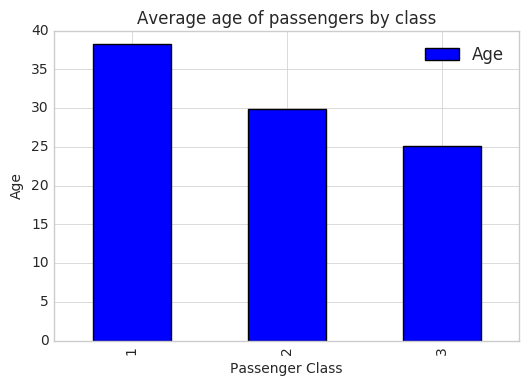

In [23]:
f_class_age = titanic_df.groupby('Pclass')['Age'].mean()
f_class_age = pd.DataFrame(data=f_class_age)
f_class_age.plot.bar(y='Age')
plt.title('Average age of passengers by class')
plt.ylabel('Age')
plt.xlabel('Passenger Class')
f_class_age

# Data wrangling (impute and drop)

* Impute age(average)
* Drop unnecessary features
* Convert categorical features to dummy value

### Define a function to impute (fill-up missing values) age feature

In [26]:
a = list(f_class_age['Age'])

def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return a[0]
        elif Pclass == 2:
            return a[1]
        else:
            return a[2]
    else:
        return age

a

[38.233440860215055, 29.87763005780347, 25.14061971830986]

### Apply the above-defined function and plot the count of numeric features

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
#Replace all NaN values of Age columns to the list f_class_age
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute_age, axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
d=titanic_df.describe()
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
dT = d.T
dT

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.292875,13.210527,0.42,22.0000,26.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


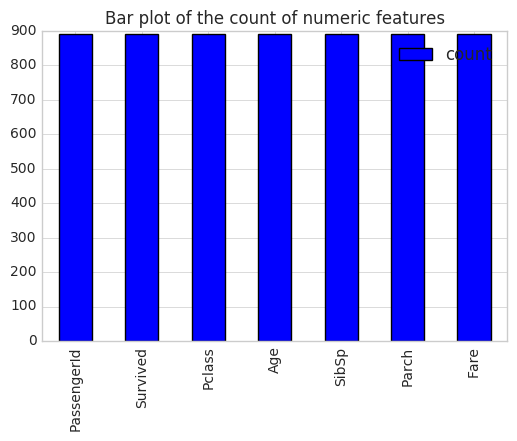

In [39]:
dT.plot.bar(y='count')
plt.title('Bar plot of the count of numeric features')

### Drop the 'Cabin' feature and any other null value

In [45]:
titanic_df.drop('Cabin', axis=1, inplace=True) #Drop the Cabin column
titanic_df.dropna(inplace=True) #Drop all NaN 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Drop other unnecessary features like 'PassengerId', 'Name', 'Ticket'

In [46]:
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Convert categorial feature like 'Sex' and 'Embarked' to dummy variables
#### Use pandas 'get_dummies()' function

In [48]:
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'], drop_first=True)

#### Now drop the 'Sex' and 'Embarked' columns and concatenate the new dummy variables

In [51]:
titanic_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_df = pd.concat([titanic_df,sex,embark], axis=1)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


This data set is now ready for logistic regression analysis!

# Logistic Regression model fit and prediction
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived', axis=1), 
                                                    titanic_df['Survived'], test_size=0.30, 
                                                    random_state=111)

# F1-score as a fucntion of regularization (penalty) parameter

C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 

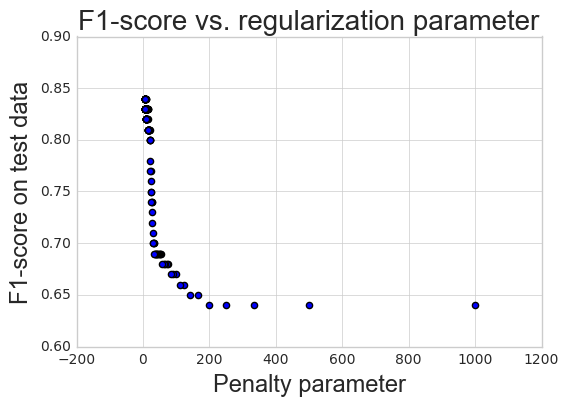

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

nsimu = 201
penalty = [0]*nsimu
logmodel = [0]*nsimu
predictions = [0]*nsimu
class_report = [0]*nsimu
f1 = [0]*nsimu

for i in range(1, nsimu):
    logmodel[i] = (LogisticRegression(C=i/1000, tol=1e-4, max_iter=100, n_jobs=4))
    logmodel[i].fit(X_train, y_train)
    predictions[i] = logmodel[i].predict(X_test)
    class_report[i] = classification_report(y_test, predictions[i])
    l = class_report[i].split()
    f1[i] = l[len(l)-2]
    penalty[i] = 1000/i
    
plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

# F1-score as a function of test set size (fraction)

C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 

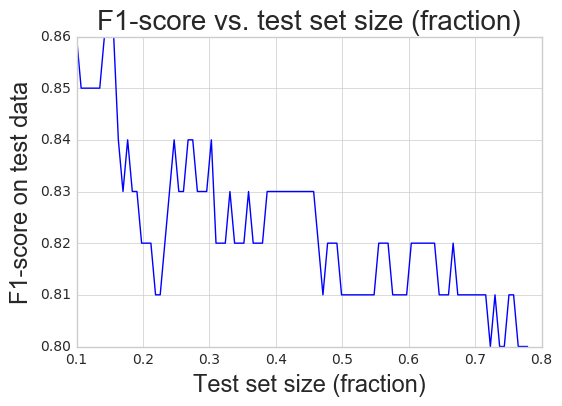

In [70]:
nsimu = 101
class_report = [0]*nsimu
f1 = [0]*nsimu
test_fraction = [0]*nsimu

for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), 
                                                    titanic_df['Survived'], test_size=0.1+(i-1)*0.007, 
                                                    random_state=111)
        logmodel =(LogisticRegression(C=1,tol=1e-4, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        test_fraction[i]=0.1+(i-1)*0.007
        
plt.plot(test_fraction[1:len(test_fraction)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. test set size (fraction)",fontsize=20)
plt.xlabel("Test set size (fraction)",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

# F1-score as a function of random seed of test/train split

C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 

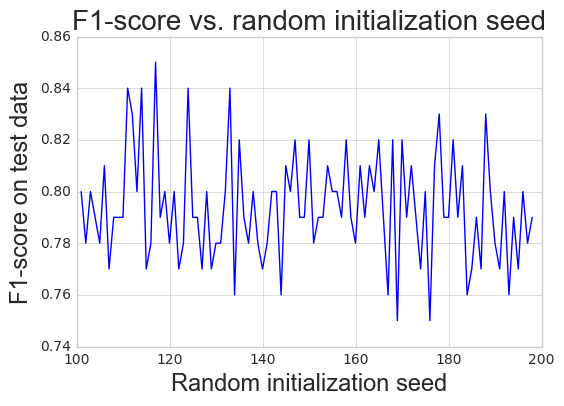

In [72]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
random_init =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), 
                                                    titanic_df['Survived'], test_size=0.3, 
                                                    random_state=i+100)
        logmodel =(LogisticRegression(C=1,tol=1e-5, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        random_init[i]=i+100

plt.plot(random_init[1:len(random_init)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. random initialization seed",fontsize=20)
plt.xlabel("Random initialization seed",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()